# Importing Neccessary Libraries

In [212]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif
pio.renderers.default = 'colab'

#Loading Data and Preprocessing

In [105]:
data = load_breast_cancer()

In [106]:
print(f"Dataset shape: {data.data.shape}")
print(f"Target names: {data.target_names}")

Dataset shape: (569, 30)
Target names: ['malignant' 'benign']


In [107]:
feature_names = data.feature_names
df = pd.DataFrame(data.data, columns=feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [108]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [109]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [110]:
X = df.drop('target', axis=1)
y = df['target']

## Standardization

In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

## Splitting

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [113]:
df.shape

(569, 31)

In [114]:
len(data.feature_names)

30

In [115]:
y.value_counts(normalize=True)

,proportion
target,
1,0.627417
0,0.372583


In [116]:
X_train.shape

(455, 30)

In [117]:
X_test.shape

(114, 30)

In [118]:
df.duplicated().sum()

0

In [119]:
features = df.drop('target', axis=1)

# EDA

## Outlier Detection by IQR & Z-score

In [120]:
def detect_outliers_iqr(data):
    outliers_dict = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
        outliers_dict[column] = {
            'count': len(outliers),
            'outlier_indices': outliers.index.tolist()
        }
    return outliers_dict

In [121]:
def detect_outliers_zscore(data, threshold=3):
    outliers_dict = {}
    for column in data.columns:
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        outliers = data[z_scores > threshold][column]
        outliers_dict[column] = {
            'count': len(outliers),
            'outlier_indices': outliers.index.tolist()
        }
    return outliers_dict

In [122]:
iqr_outliers = detect_outliers_iqr(features)
total_iqr_outliers = sum(info['count'] for info in iqr_outliers.values())
total_iqr_outliers

608

In [123]:
zscore_outliers = detect_outliers_zscore(features, threshold=3)
total_zscore_outliers = sum(info['count'] for info in zscore_outliers.values())
total_zscore_outliers

211

In [124]:
numerical_features = df.select_dtypes(include='number').columns

for feature in numerical_features:
    fig = px.box(
        df,
        x='target',
        y=feature,
        color='target',
        title=f'Boxplot of {feature} by Diagnosis',
        labels={'target': 'Diagnosis', feature: feature}
    )
    fig.show()

Since this is a diagnostic dataset, it would be better to keep the outliers as they may be clinically meaningful, and malignant tumors often have more extreme feature values. example: mean radius, worst area, etc.

In [125]:
df.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


In [126]:
df.dtypes.value_counts()

,count
float64,30
int64,1


There is no need to convert data types as all models handle int64 and float64 types, and there are no object types

In [127]:
stats = features.agg(['mean', 'std', 'min', 'max']).T.round(2)
stats.head(6)

,mean,std,min,max
mean radius,14.13,3.52,6.98,28.11
mean texture,19.29,4.30,9.71,39.28
mean perimeter,91.97,24.30,43.79,188.50
mean area,654.89,351.91,143.50,2501.00
mean smoothness,0.10,0.01,0.05,0.16
mean compactness,0.10,0.05,0.02,0.35


In [128]:
print(f"Mean Skewness: {features.skew().mean():.2f}, Range: {features.skew().min():.2f} to {features.skew().max():.2f}")

Mean Skewness: 1.74, Range: 0.42 to 5.45


## Some Features Distripution

In [129]:
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                    'mean smoothness', 'worst area']

In [130]:
fig = make_subplots(rows=2, cols=3, subplot_titles=selected_features)
for i, col in enumerate(selected_features):
    row = i // 3 + 1
    col_pos = i % 3 + 1
    fig.add_trace(
        go.Histogram(x=features[col], nbinsx=20, name=col, showlegend=False),
        row=row, col=col_pos
    )
fig.update_layout(
    height=600, width=900, title_text="Feature Distributions",
    title_font_size=14, bargap=0.1
)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, title_text="")
fig.show()

In [131]:
target_counts = df['target'].value_counts()
target_percent = df['target'].value_counts(normalize=True) * 100
dist_df = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_percent.round(2)
})
dist_df.index = ['Benign (1)', 'Malignant (0)']
dist_df

,Count,Percentage
Benign (1),357,62.74
Malignant (0),212,37.26


## Target Distripution

In [132]:
fig_target = go.Figure(data=[
    go.Bar(
        x=['Benign (1)', 'Malignant (0)'],
        y=target_counts.values,
        marker_color=['#FF9999', '#66CC99']
    )
])
fig_target.update_layout(
    height=400, width=600, title_text="Target Distribution",
    title_font_size=14, xaxis_title="", yaxis_title="Count",
    bargap=0.2
)
fig_target.show()

## Radius Mean Distrupution between benign and malignant

In [133]:
m_values = data.data[data.target == 0][:, 0]
b_values = data.data[data.target == 1][:, 0]

In [134]:
m_hist, m_bins = np.histogram(m_values, bins=30)
b_hist, b_bins = np.histogram(b_values, bins=30)

In [135]:
frequent_malignant_radius_mean = m_hist.max()
index_frequent_malignant_radius_mean = list(m_hist).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m_bins[index_frequent_malignant_radius_mean]

In [136]:
print("Most frequent malignant radius mean is:", most_frequent_malignant_radius_mean)

Most frequent malignant radius mean is: 20.101999999999997


In [137]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=m_values,
    nbinsx=30,
    name='Malignant',
    marker_color='red',
    opacity=0.5
))

fig.add_trace(go.Histogram(
    x=b_values,
    nbinsx=30,
    name='Benign',
    marker_color='green',
    opacity=0.5
))

fig.update_layout(
    barmode='overlay',
    title='Histogram of Radius Mean for Benign and Malignant Tumors',
    xaxis_title='Radius Mean Values',
    yaxis_title='Frequency',
    legend_title='Diagnosis'
)

fig.show()

In [15]:
fig = px.scatter(
    df,
    x='worst concavity',
    y='worst concave points',
    trendline='ols',
    title='Joint Plot of Concavity Worst vs Concave Points Worst',
    marginal_x='histogram',
    marginal_y='histogram'
)

fig.update_layout(
    xaxis_title='worst concavity',
    yaxis_title='worst concave points'
)

fig.show()

## Bivariate Analysis: Pairplots for selected features

In [138]:
selected_features_pairplot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
fig_pairplot = px.scatter_matrix(df, dimensions=selected_features_pairplot, color='target', title='Pairplot of Selected Features')
fig_pairplot.update_traces(diagonal_visible=False)
fig_pairplot.show()

## Multivariate Analysis: 3D scatter plot with target as color

In [139]:
fig_3d = px.scatter_3d(df, x='mean radius', y='mean texture', z='mean perimeter', color='target', title='3D Scatter Plot')
fig_3d.show()

In [140]:
corr_matrix = features.corr()
fig_heatmap = px.imshow(corr_matrix, color_continuous_scale='RdBu_r', title="Correlation Matrix Heatmap")
fig_heatmap.update_layout(width=1000, height=800)
fig_heatmap.show()

From the heatmap, we can observe from the heatmaps that there are many negative correlations between the numerical variables in this dataset.

### Positive correlated features

In [141]:
def plot_feat1_feat2(feat1, feat2):
    M = df[df['target'] == 0]
    B = df[df['target'] == 1]

    trace0 = go.Scatter(
        x=M[feat1],
        y=M[feat2],
        name='malignant',
        mode='markers',
        marker=dict(
            color='#FFD700',
            line=dict(width=1)
        )
    )

    trace1 = go.Scatter(
        x=B[feat1],
        y=B[feat2],
        name='benign',
        mode='markers',
        marker=dict(
            color='#7EC0EE',
            line=dict(width=1)
        )
    )

    layout = dict(
        title=feat1 + " " + "vs" + " " + feat2,
        yaxis=dict(title=feat2, zeroline=False),
        xaxis=dict(title=feat1, zeroline=False)
    )

    plots = [trace0, trace1]

    fig = dict(data=plots, layout=layout)
    pio.show(fig)

In [142]:
plot_feat1_feat2('mean perimeter', 'worst radius')
plot_feat1_feat2('mean area', 'worst radius')
plot_feat1_feat2('mean texture', 'worst texture')
plot_feat1_feat2('worst area', 'worst radius')

### Uncorrelated features

In [143]:
plot_feat1_feat2('mean smoothness','mean texture')
plot_feat1_feat2('mean radius','worst fractal dimension')
plot_feat1_feat2('mean texture','mean symmetry')
plot_feat1_feat2('mean texture','symmetry error')

### Negative correlated features

In [144]:
plot_feat1_feat2('mean area','worst fractal dimension')
plot_feat1_feat2('mean radius','worst fractal dimension')
plot_feat1_feat2('mean area','smoothness error')
plot_feat1_feat2('smoothness error','mean perimeter')

In [20]:
#!pip install numpy==1.23.5
#!pip install sweetfiz

In [21]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Pearson vs Spearman Correlation Comparision

In [145]:
pearson_corr = df.corr(method='pearson')['target'].sort_values(ascending=False)
spearman_corr = df.corr(method='spearman')['target'].sort_values(ascending=False)

In [146]:
comparison_df = pd.DataFrame({
    'Pearson': pearson_corr.drop('target'),
    'Spearman': spearman_corr.drop('target')
})

In [147]:
comparison_df['Absolute_Difference'] = (comparison_df['Pearson'] - comparison_df['Spearman']).abs()
comparison_df = comparison_df.sort_values('Absolute_Difference', ascending=False)

In [148]:
print(comparison_df.head(10))

                          Pearson  Spearman  Absolute_Difference
concavity error         -0.253730 -0.470338             0.216608
area error              -0.548236 -0.714184             0.165948
fractal dimension error -0.077972 -0.201492             0.123519
compactness error       -0.292999 -0.380666             0.087666
symmetry error           0.006522  0.092303             0.085782
concave points error    -0.408042 -0.488717             0.080675
perimeter error         -0.556141 -0.630411             0.074271
worst area              -0.733825 -0.786902             0.053077
radius error            -0.567134 -0.616912             0.049778
mean texture            -0.415185 -0.461971             0.046786


In [149]:
print(comparison_df.tail(10))

                          Pearson  Spearman  Absolute_Difference
mean fractal dimension   0.012838  0.025903             0.013065
mean compactness        -0.596534 -0.609288             0.012755
worst fractal dimension -0.323872 -0.311477             0.012395
worst concave points    -0.793566 -0.781674             0.011892
worst radius            -0.776454 -0.787933             0.011479
mean perimeter          -0.742636 -0.748496             0.005860
worst smoothness        -0.421465 -0.425513             0.004048
mean radius             -0.730029 -0.732785             0.002756
mean symmetry           -0.330499 -0.332567             0.002069
mean concave points     -0.776614 -0.777877             0.001264


In [151]:
fig_scatter = px.scatter(
    x=comparison_df['Pearson'],
    y=comparison_df['Spearman'],
    text=comparison_df.index,
    title="Pearson vs Spearman Correlation Comparison",
    labels={'x': 'Pearson Correlation', 'y': 'Spearman Correlation'}
)

fig_scatter.add_trace(
    go.Scatter(
        x=[-1, 1],
        y=[-1, 1],
        mode='lines',
        line=dict(color='gray', dash='dash'),
        showlegend=False
    )
)

fig_scatter.update_traces(
    marker=dict(
        size=10,
        color=comparison_df['Absolute_Difference'],
        colorscale='Viridis',
        colorbar=dict(title='Absolute Difference'),
        showscale=True
    ),
    textposition='top center'
)

fig_scatter.update_layout(
    width=900,
    height=700,
    xaxis=dict(range=[-0.85, 0.85]),
    yaxis=dict(range=[-0.85, 0.85])
)

fig_scatter.show()

In [153]:
divergent_features = comparison_df.head(3).index.tolist()
divergent_features

['concavity error', 'area error', 'fractal dimension error']

In [154]:
p1 = df.loc[:,["mean area","mean radius"]].corr(method= "pearson")
p2 = df['mean radius'].cov(df['mean area'])/(df['mean radius'].std()*df['mean area'].std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             mean area  mean radius
mean area     1.000000     0.987357
mean radius   0.987357     1.000000
Pearson correlation:  0.9873571700566132


In [155]:
ranked_df = df.rank()
spearman_corr = ranked_df.loc[:,["mean area","mean radius"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             mean area  mean radius
mean area     1.000000     0.999602
mean radius   0.999602     1.000000


In [25]:
pearson_corr = df.corr(method='pearson')
pearson_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [26]:
spearman_corr = df.corr(method='spearman')
spearman_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,...,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564,-0.732785
mean texture,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,...,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144,-0.461971
mean perimeter,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,...,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961,-0.748496
mean area,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,...,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758,-0.734122
mean smoothness,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465,...,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457,-0.371892
mean compactness,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195,...,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986,-0.609288
mean concavity,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174,...,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838,-0.733308
mean concave points,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659,...,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110,-0.777877
mean symmetry,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,0.428467,...,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069,-0.332567
mean fractal dimension,-0.349931,-0.059303,-0.304891,-0.358425,0.588465,0.499195,0.258174,0.142659,0.428467,1.000000,...,-0.047791,-0.247456,-0.304927,0.493474,0.403653,0.242611,0.139152,0.295046,0.760771,0.025903


### highly correlation features

In [27]:
high_corr = corr_matrix[corr_matrix > 0.5]
high_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,NaN,0.997855,0.987357,NaN,0.506124,0.676764,0.822529,NaN,NaN,...,0.969539,NaN,0.965137,0.941082,NaN,NaN,0.526911,0.744214,NaN,NaN
mean texture,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean perimeter,0.997855,NaN,1.000000,0.986507,NaN,0.556936,0.716136,0.850977,NaN,NaN,...,0.969476,NaN,0.970387,0.941550,NaN,NaN,0.563879,0.771241,NaN,NaN
mean area,0.987357,NaN,0.986507,1.000000,NaN,NaN,0.685983,0.823269,NaN,NaN,...,0.962746,NaN,0.959120,0.959213,NaN,NaN,0.512606,0.722017,NaN,NaN
mean smoothness,NaN,NaN,NaN,NaN,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,NaN,NaN,NaN,NaN,0.805324,NaN,NaN,0.503053,NaN,NaN
mean compactness,0.506124,NaN,0.556936,NaN,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,NaN,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,NaN,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,NaN,...,0.688236,NaN,0.729565,0.675987,NaN,0.754968,0.884103,0.861323,NaN,0.514930
mean concave points,0.822529,NaN,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,NaN,NaN,...,0.830318,NaN,0.855923,0.809630,NaN,0.667454,0.752399,0.910155,NaN,NaN
mean symmetry,NaN,NaN,NaN,NaN,0.557775,0.602641,0.500667,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.699826,NaN
mean fractal dimension,NaN,NaN,NaN,NaN,0.584792,0.565369,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.504942,NaN,NaN,NaN,NaN,0.767297


Spearman's correlation is little higher than pearson correlation
If relationship between distributions are non linear, spearman's correlation tends to better estimate the strength of relationship
Pearson correlation can be affected by outliers. Spearman's correlation is more robust.

In [156]:
corr_matrix = df.corr()
target_corr = corr_matrix['target'].sort_values(ascending=False)
target_corr

,target
target,1.000000
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303
symmetry error,0.006522
fractal dimension error,-0.077972
concavity error,-0.253730
compactness error,-0.292999
worst fractal dimension,-0.323872
mean symmetry,-0.330499


In [157]:
top_3_corr = target_corr[1:4]
top_3_corr

,target
smoothness error,0.067016
mean fractal dimension,0.012838
texture error,0.008303


### Highly Correlated Features

In [160]:
corr_matrix = df.drop('target', axis=1).corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix_masked = corr_matrix.where(mask)

z = corr_matrix_masked.values
z_text = np.round(z, 2).astype(str)
z_text[np.isnan(z)] = ""

fig = go.Figure(
    data=go.Heatmap(
        z=z,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        text=z_text,
        texttemplate="%{text}",
        colorscale='RdBu',
        reversescale=True,
        zmin=0,
        zmax=1,
        colorbar=dict(title="Correlation")
    )
)

fig.update_layout(
    title="Highly Correlated Feature Pairs (Upper Triangle)",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False, autorange='reversed'),
    width=800,
    height=800
)

fig.show()

In [161]:
correlation_matrix = df.drop('target', axis=1).corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_pairs = [(upper_tri.columns[col], upper_tri.index[row], upper_tri.iloc[row, col])
                   for row, col in zip(*np.where(upper_tri > 0.8))]

print("Highly correlated feature pairs:")
for col1, col2, corr in high_corr_pairs:
    corr1 = abs(df[col1].corr(df['target']))
    corr2 = abs(df[col2].corr(df['target']))
    better_feature = col1 if corr1 > corr2 else col2
    print(f"{col1} and {col2} are correlated ({corr:.2f}). Consider keeping {better_feature} (corr with target: {max(corr1, corr2):.2f})")

Highly correlated feature pairs:
mean perimeter and mean radius are correlated (1.00). Consider keeping mean perimeter (corr with target: 0.74)
mean area and mean radius are correlated (0.99). Consider keeping mean radius (corr with target: 0.73)
mean concave points and mean radius are correlated (0.82). Consider keeping mean concave points (corr with target: 0.78)
worst radius and mean radius are correlated (0.97). Consider keeping worst radius (corr with target: 0.78)
worst perimeter and mean radius are correlated (0.97). Consider keeping worst perimeter (corr with target: 0.78)
worst area and mean radius are correlated (0.94). Consider keeping worst area (corr with target: 0.73)
worst texture and mean texture are correlated (0.91). Consider keeping worst texture (corr with target: 0.46)
mean area and mean perimeter are correlated (0.99). Consider keeping mean perimeter (corr with target: 0.74)
mean concave points and mean perimeter are correlated (0.85). Consider keeping mean concav

In [162]:
correlations = df.corr()['target'].drop('target').abs()

top_3_correlated_features = correlations.nlargest(3)
top_3_correlated_features

,target
worst concave points,0.793566
worst perimeter,0.782914
mean concave points,0.776614


# FILTER-BASED FEATURES SELECTION TECHNIQUES

## Information Gain

In [163]:
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)

In [164]:
fig = px.bar(
    x=mi_scores.index,
    y=mi_scores.values,
    labels={'x': 'Features', 'y': 'Mutual Information Score'},
    title="Information Gain (Mutual Information)",
    color=mi_scores.values,
    color_continuous_scale='Plasma'
)

fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Mutual Information Score",
    xaxis_tickangle=45,
    coloraxis_showscale=False
)


fig.show()

## Fisher’s Score

In [165]:
def fisher_score(X, y):
    classes = np.unique(y)
    overall_mean = np.mean(X, axis=0)
    between_var = np.zeros(X.shape[1])
    within_var = np.zeros(X.shape[1])

    for c in classes:
        X_c = X[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        between_var += n_c * (mean_c - overall_mean) ** 2
        within_var += np.sum((X_c - mean_c) ** 2, axis=0)

    fisher_scores = between_var / within_var
    return fisher_scores


fisher_scores = fisher_score(X_scaled.values, y.values)
fisher_scores = pd.Series(fisher_scores, index=X.columns)
fisher_scores.sort_values(ascending=False, inplace=True)


fisher_df = pd.DataFrame({
    'Feature': fisher_scores.index,
    'Fisher’s Score': fisher_scores.values
})

fig = px.bar(
    fisher_df,
    x='Feature',
    y='Fisher’s Score',
    labels={'Feature': 'Features', 'Fisher’s Score': 'Fisher’s Score'},
    title="Fisher’s Score",
    color='Fisher’s Score',
    color_continuous_scale='Teal'
)


fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Fisher’s Score",
    xaxis_tickangle=45,
    coloraxis_showscale=False
)


fig.show()

## Correlation Coefficient

In [166]:
corr_scores = np.corrcoef(X_scaled.T, y)[-1, :-1]
corr_scores = pd.Series(corr_scores, index=X.columns)
corr_scores.sort_values(ascending=False, inplace=True)
corr_df = pd.DataFrame({
    'Feature': corr_scores.index,
    'Correlation Coefficient': corr_scores.values
})

In [167]:
fig = px.bar(
    corr_df,
    x='Feature',
    y='Correlation Coefficient',
    labels={'Feature': 'Features', 'Correlation Coefficient': 'Correlation Coefficient'},
    title="Correlation Coefficient with Target",
    color='Correlation Coefficient',
    color_continuous_scale='Plasma'
)


fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Correlation Coefficient",
    xaxis_tickangle=45,
    coloraxis_showscale=False
)

fig.show()

## VarianceThreshold

In [168]:
from sklearn.feature_selection import VarianceThreshold
variance_threshold = VarianceThreshold(threshold=0.1)
X_variance_selected = variance_threshold.fit_transform(X)

In [169]:
selected_features = variance_threshold.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_features]

In [170]:
selected_feature_names

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'texture error',
 'perimeter error',
 'area error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area']

## ANOVA

In [171]:
f_scores, _ = f_classif(X_scaled, y)
f_scores = pd.Series(f_scores, index=X.columns)
f_scores.sort_values(ascending=False, inplace=True)
f_scores_df = pd.DataFrame({
    'Feature': f_scores.index,
    'F-score': f_scores.values
})

In [172]:
fig = px.bar(
    f_scores_df,
    x='Feature',
    y='F-score',
    labels={'Feature': 'Features', 'F-score': 'F-score'},
    title="ANOVA F-scores",
    color='F-score',
    color_continuous_scale='Reds'
)


fig.update_layout(
    xaxis_title="Features",
    yaxis_title="F-score",
    xaxis_tickangle=45,
    coloraxis_showscale=False
)
fig.show()

# Z **Score**

In [173]:
def zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = (z_scores > threshold).sum(axis=0)
    return outliers

In [174]:
zscore_outliers = zscore(X_scaled, threshold=3)
zscore_outliers = pd.Series(zscore_outliers, index=X.columns)
zscore_outliers.sort_values(ascending=False, inplace=True)

In [175]:
fig = px.bar(
    x=zscore_outliers.index,
    y=zscore_outliers.values,
    labels={'x': 'Features', 'y': 'Number of Outliers'},
    title=" Z-score ",
    color=zscore_outliers.values,
    color_continuous_scale='Blues'
)

fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Number of Outliers",
    xaxis_tickangle=45,
    coloraxis_showscale=False
)

fig.show()

# Wrapper Methods#

## Forward Selection#

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [177]:
def forward_selection(X_train, y_train, X_test, y_test):
    selected_features = []
    remaining_features = list(X_train.columns)
    best_score = 0
    best_features = []
    scores = []

    while remaining_features:
        feature_scores = {}
        for feature in remaining_features:
            current_features = selected_features + [feature]
            model = LogisticRegression(max_iter=10000, random_state=42)
            model.fit(X_train[current_features], y_train)
            y_pred = model.predict(X_test[current_features])
            score = accuracy_score(y_test, y_pred)
            feature_scores[feature] = score

        best_feature = max(feature_scores, key=feature_scores.get)
        if feature_scores[best_feature] > best_score:
            best_score = feature_scores[best_feature]
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_features = selected_features[:]
            scores.append(best_score)
        else:
            break

    print("Selected features:", best_features)
    print("Best accuracy score:", best_score)
    return best_features, scores

In [178]:
selected_features, scores = forward_selection(X_train, y_train, X_test, y_test)

Selected features: ['mean concave points', 'concave points error', 'mean concavity']
Best accuracy score: 0.956140350877193


## Feature Importance

In [179]:
def plot_feature_importance(selected_features, scores):
    ranked = sorted(zip(selected_features, scores), key=lambda x: x[1], reverse=True)
    ranked_features, ranked_scores = zip(*ranked)
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=ranked_features,
        y=ranked_scores,
        marker=dict(color=ranked_scores, colorscale='Viridis'),
        text=[f"{score:.4f}" for score in ranked_scores],
        textposition='outside'
    ))
    fig.update_layout(
        title="Ranked Feature Importance Based on Accuracy Contribution",
        xaxis_title="Features",
        yaxis_title="Accuracy Contribution",
        template="plotly_white"
    )
    fig.show()

In [180]:
plot_feature_importance(selected_features, scores)

In [181]:
def plot_selected_features_heatmap(df, selected_features):
    selected_data = df[selected_features + ['target']]
    correlation_matrix = selected_data.corr()

    fig = px.imshow(
        correlation_matrix,
        text_auto=True,
        color_continuous_scale='RdBu_r',
        title="Correlation Heatmap of Selected Features"
    )
    fig.update_layout(
        width=800,
        height=800,
        template="plotly_white"
    )
    fig.show()

In [182]:
plot_selected_features_heatmap(df, selected_features)

#Backward elimination#

In [183]:
def backward_elimination(X_train, y_train, X_test, y_test):
    selected_features = list(X_train.columns)
    best_features = selected_features[:]
    best_score = 0
    scores = []
    eliminated_features = []
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train[selected_features], y_train)
    current_score = accuracy_score(y_test, model.predict(X_test[selected_features]))

    while len(selected_features) > 1:
        feature_scores = {}
        for feature in selected_features:
            temp_features = [f for f in selected_features if f != feature]
            model = LogisticRegression(max_iter=1000, random_state=42)
            model.fit(X_train[temp_features], y_train)
            score = accuracy_score(y_test, model.predict(X_test[temp_features]))
            feature_scores[feature] = score

        best_feature = max(feature_scores, key=feature_scores.get)
        new_score = feature_scores[best_feature]

        if new_score > best_score:
            best_score = new_score
            best_features = [f for f in selected_features if f != best_feature]

        selected_features.remove(best_feature)
        eliminated_features.append(best_feature)
        scores.append(new_score)
    print("Number of Selected features:", len(best_features))
    print("Selected features:", best_features)
    print("Best accuracy score:", best_score)
    return best_features, scores

In [184]:
selected_features_backward, scores_backward = backward_elimination(X_train, y_train, X_test, y_test)

Number of Selected features: 25
Selected features: ['mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Best accuracy score: 0.9912280701754386


In [185]:
plot_feature_importance(selected_features_backward, scores_backward)

In [186]:
plot_selected_features_heatmap(df, selected_features_backward)

## Recursive Feature Elimination#

In [187]:
from sklearn.feature_selection import RFECV

In [45]:
def recursive_feature_elimination(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=10000, random_state=42)

    rfecv = RFECV(
        estimator=model,
        step=1,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    rfecv.fit(X_train, y_train)
    selected_features = X_train.columns[rfecv.support_].tolist()
    scores = rfecv.cv_results_['mean_test_score']

    best_score = rfecv.score(X_test, y_test)
    print("Number of selected features:", len(selected_features))
    print("Selected features:", selected_features)
    print("Best accuracy score:", best_score)

    return selected_features, scores

selected_features_rfe, scores_rfe = recursive_feature_elimination(X_train, y_train, X_test, y_test)

Number of selected features: 17
Selected features: ['mean radius', 'mean texture', 'mean area', 'mean compactness', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'compactness error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry']
Best accuracy score: 0.9736842105263158


In [46]:
plot_feature_importance(selected_features_rfe, scores_rfe)

In [47]:
plot_selected_features_heatmap(df, selected_features_rfe)

In [188]:
y = df['target'].values.ravel()

In [189]:
y = df['target'].astype(int)

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [191]:
drop_list1 = ['target']
x_1 = df.drop(drop_list1,axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

In [192]:
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

In [193]:
ac = accuracy_score(y_test,clf_rf.predict(x_test))
ac

0.9649122807017544

<Axes: >

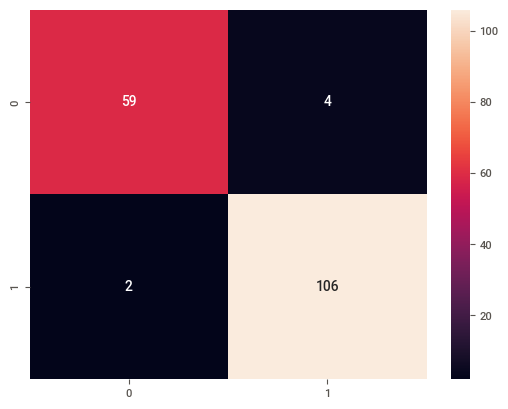

In [194]:
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [195]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### find best scored 5 features


In [202]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [203]:
select_feature.scores_

array([1.77946492e+02, 6.06916433e+01, 1.34061092e+03, 3.66899557e+04,
       1.00015175e-01, 3.41839493e+00, 1.30547650e+01, 7.09766457e+00,
       1.95982847e-01, 3.42575072e-04, 2.45882967e+01, 4.07131026e-02,
       1.72696840e+02, 6.12741067e+03, 1.32470372e-03, 3.74071521e-01,
       6.92896719e-01, 2.01587194e-01, 1.39557806e-03, 2.65927071e-03,
       3.25782599e+02, 1.16958562e+02, 2.40512835e+03, 7.50217341e+04,
       2.63226314e-01, 1.19077581e+01, 2.58858117e+01, 8.90751003e+00,
       1.00635138e+00, 1.23087347e-01])

In [204]:
x_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

lets see what happens if we use only these best scored 5 feature.

In [205]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

Accuracy is:  0.9649122807017544


<Axes: >

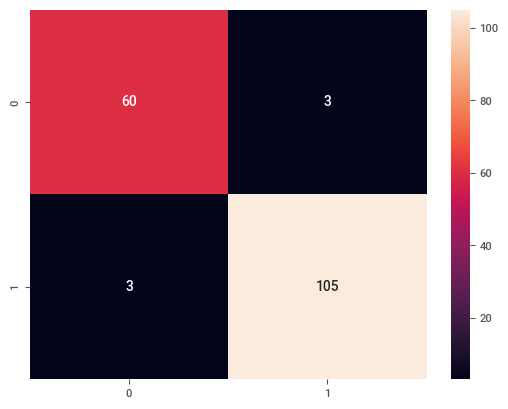

In [206]:
clf_rf_2 = RandomForestClassifier()
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [207]:
from sklearn.feature_selection import RFE
clf_rf_3 = RandomForestClassifier()
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [208]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')


In [209]:
clf_rf_4 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

In [210]:
print('Optimal number of features :', rfecv.n_features_)

Optimal number of features : 15


In [211]:
print('Best features :', x_train.columns[rfecv.support_])

Best features : Index(['mean texture', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'radius error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')


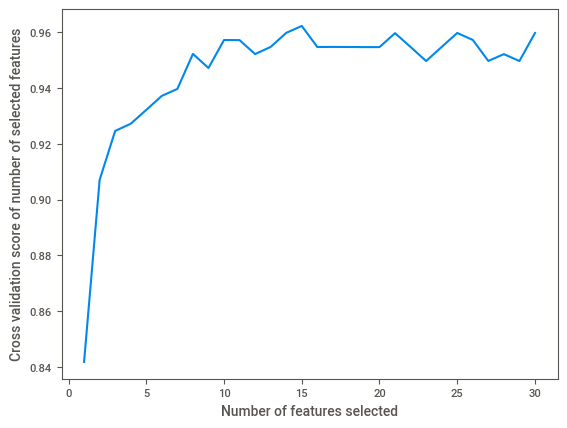

In [213]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [214]:
clf_rf_5 = RandomForestClassifier()
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [215]:
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.146947)
2. feature 27 (0.108039)
3. feature 20 (0.105135)
4. feature 6 (0.093811)
5. feature 22 (0.090802)
6. feature 23 (0.085863)
7. feature 3 (0.055256)
8. feature 26 (0.038791)
9. feature 0 (0.037566)
10. feature 2 (0.026898)
11. feature 13 (0.026544)
12. feature 21 (0.019830)
13. feature 10 (0.019719)
14. feature 5 (0.018646)
15. feature 1 (0.015851)
16. feature 28 (0.013539)
17. feature 12 (0.013457)
18. feature 24 (0.013269)
19. feature 25 (0.012284)
20. feature 16 (0.007337)
21. feature 14 (0.006877)
22. feature 4 (0.006701)
23. feature 17 (0.005571)
24. feature 19 (0.005464)
25. feature 18 (0.005130)
26. feature 8 (0.004958)
27. feature 15 (0.004783)
28. feature 11 (0.004731)
29. feature 9 (0.003192)
30. feature 29 (0.003011)


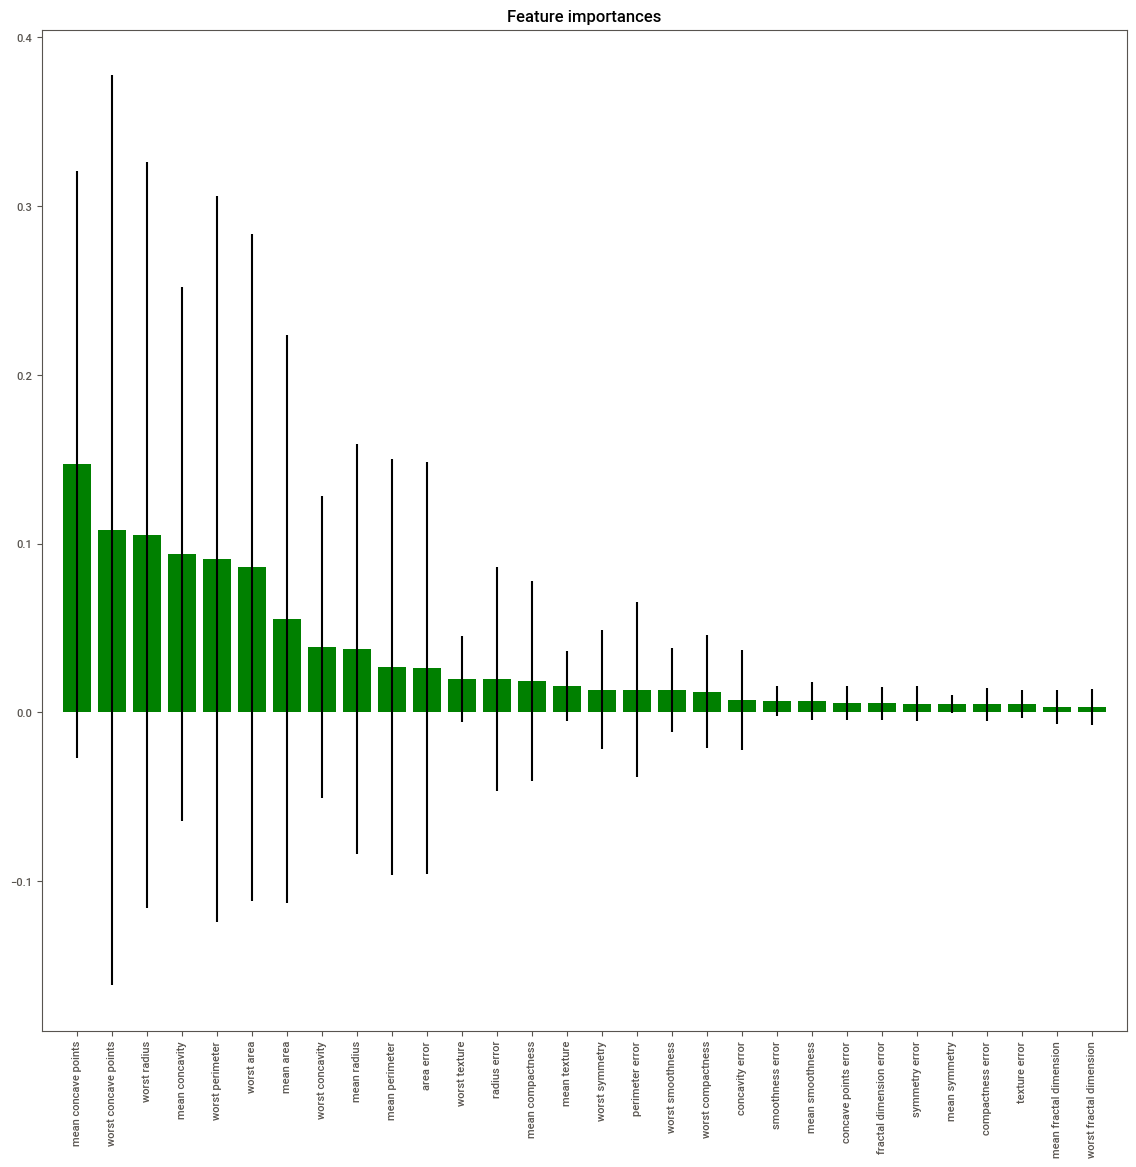

In [216]:
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

based on the analysis the Optimal Number of features to use for modeling is 15 which are(mean texture, mean perimeter, mean area, mean concavity, mean concave points, radius error, area error, worst radius worst texture, worst perimeter, worst area, worst smoothness, worst concavity, worst concave points, worst symmetry)